In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("cleaned_spotify_data.csv")

features = ["danceability", "energy", "key", "loudness", "mode", "speechiness","acousticness", "instrumentalness", "liveness", "valence", "tempo"]
target = "popularity"

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)
model = DecisionTreeRegressor(random_state=40)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))




MSE: 43.03165854708856


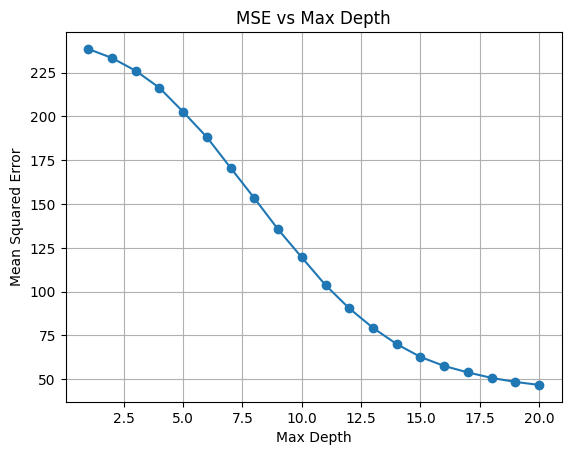

<Figure size 640x480 with 0 Axes>

In [7]:
# ii
import matplotlib.pyplot as plt

mseDepth = []
depths = range(1, 21)
for d in depths:
    model = DecisionTreeRegressor(max_depth=d, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mseDepth.append(mean_squared_error(y_test, y_pred))

plt.plot(depths, mseDepth, marker='o')
plt.title("MSE vs Max Depth")
plt.xlabel("Max Depth")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()
plt.savefig("DTmsemaxdepth")


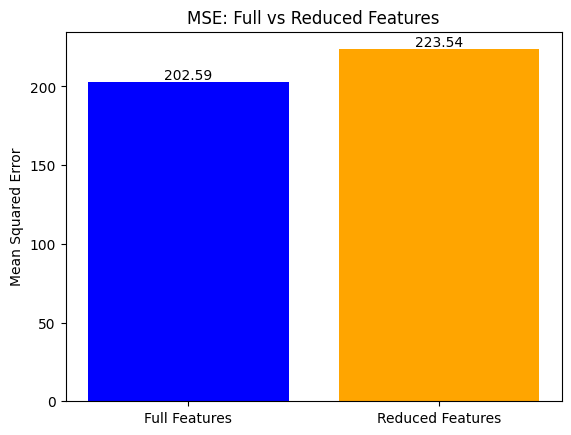

<Figure size 640x480 with 0 Axes>

In [8]:
#iii
reduced_features = ["danceability", "energy", "tempo"]

X_train_reduced = X_train[reduced_features]
X_test_reduced = X_test[reduced_features]

model_full = DecisionTreeRegressor(max_depth=5, random_state=42)
model_reduced = DecisionTreeRegressor(max_depth=5, random_state=42)

model_full.fit(X_train, y_train)
model_reduced.fit(X_train_reduced, y_train)

mse_full = mean_squared_error(y_test, model_full.predict(X_test))
mse_reduced = mean_squared_error(y_test, model_reduced.predict(X_test_reduced))

plt.bar(["Full Features", "Reduced Features"], [mse_full, mse_reduced], color=["blue", "orange"])
plt.title("MSE: Full vs Reduced Features")
plt.ylabel("Mean Squared Error")
plt.text(0, mse_full, f"{mse_full:.2f}", ha='center', va='bottom')
plt.text(1, mse_reduced, f"{mse_reduced:.2f}", ha='center', va='bottom')
plt.show()
plt.savefig("DTreducedfeatures")


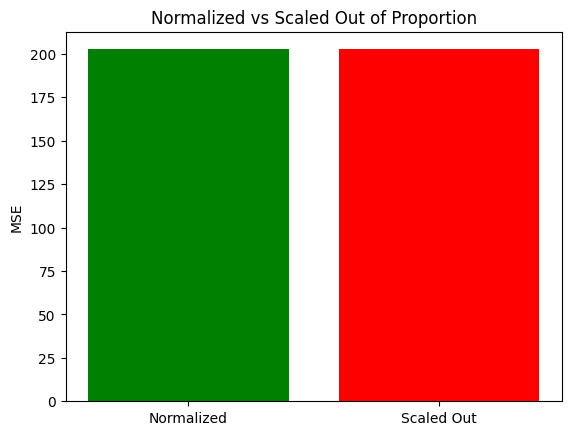

<Figure size 640x480 with 0 Axes>

In [9]:
#iv
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = DecisionTreeRegressor(max_depth=5, random_state=42)
model_scaled.fit(X_train_scaled, y_train)
mse_scaled = mean_squared_error(y_test, model_scaled.predict(X_test_scaled))

# Exaggerate first feature
X_train_scaled_out = X_train_scaled.copy()
X_test_scaled_out = X_test_scaled.copy()
X_train_scaled_out[:, 0] *= 100
X_test_scaled_out[:, 0] *= 100

model_scaled_out = DecisionTreeRegressor(max_depth=5, random_state=42)
model_scaled_out.fit(X_train_scaled_out, y_train)
mse_scaled_out = mean_squared_error(y_test, model_scaled_out.predict(X_test_scaled_out))

# Plot
plt.bar(["Normalized", "Scaled Out"], [mse_scaled, mse_scaled_out], color=["green", "red"])
plt.title("Normalized vs Scaled Out of Proportion")
plt.ylabel("MSE")
plt.show()
plt.savefig("DTscaled")
